In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== Carregar a planilha =====
df_customer = pd.read_csv("Customer.csv", sep=";")

# ===== 1. Informações gerais =====
print("\n----- Valores nulos por coluna -----")
print(df_customer.isna().sum())

print("\n----- Estatísticas gerais -----")
print(df_customer.describe(include="all"))

print("\n---------- 1. Exibir colunas da tabela Customer ----------")
print(df_customer[["name", "gender", "dateOfBirth", "createdAt"]])

# ===== 2. Ordenar por data de criação =====
# Convertendo para datetime com dayfirst=True
df_customer["createdAt"] = pd.to_datetime(df_customer["createdAt"], dayfirst=True)
df_customer["dateOfBirth"] = pd.to_datetime(df_customer["dateOfBirth"], dayfirst=True, errors='coerce')  # Coerce para lidar com valores inválidos

print("\n---------- 2. Tabela ordenada por data de criação ----------")
print(df_customer[["name", "gender", "dateOfBirth", "createdAt"]].sort_values(by="createdAt", ascending=False))

# ===== 3. Contar quantas vezes cada data de criação aparece =====
df_customer["created_date"] = df_customer["createdAt"].dt.date
print("\n---------- 3. Contagem por data de criação ----------")
print(df_customer["created_date"].value_counts())

# Agrupar por mês
df_customer["created_month"] = df_customer["createdAt"].dt.to_period("M")
contagem_por_mes = df_customer["created_month"].value_counts().sort_index()

# Plot mais limpo
plt.figure(figsize=(12,5))
contagem_por_mes.plot(kind="bar", color="skyblue")
plt.title("Quantidade de Clientes Criados por Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)  # Rotaciona para ficar legível
plt.tight_layout()       # Ajusta layout
plt.show()

# ===== 4. Análise de gênero =====
df_com_genero = df_customer[df_customer["gender"].notna()]
print("\n---------- 4. Clientes com gênero não nulo ----------")
print(df_com_genero[["name", "gender", "dateOfBirth", "createdAt"]])

contagem_genero = df_com_genero["gender"].value_counts()
print("\nContagem por gênero:")
print(contagem_genero)

# ===== 5. Análise de datas de nascimento e idade =====
df_com_data_nascimento = df_customer[df_customer["dateOfBirth"].notna()]
print("\n---------- 5. Clientes com data de nascimento não nula ----------")
print(df_com_data_nascimento[["name", "gender", "dateOfBirth", "createdAt"]])

# Calcular idade
df_customer["age"] = (pd.Timestamp.today() - df_customer["dateOfBirth"]).dt.days // 365

# Plot distribuição de idade
df_customer["age"].hist(bins=20, figsize=(10,4))
plt.title("Distribuição de Idade")
plt.xlabel("Idade")
plt.ylabel("Quantidade de Clientes")
plt.show()


In [4]:
import pandas as pd
import plotly.express as px

# === Carregar dados ===
df_orders = pd.read_csv("Order.csv", sep=";")

# Padronizar nomes das colunas
df_orders.columns = df_orders.columns.str.strip().str.lower()

# === Conversões de datas ===
date_cols = ["createdat", "scheduledat", "updatedat"]
for col in date_cols:
    if col in df_orders.columns:
      df_orders[col] = pd.to_datetime(df_orders[col], dayfirst=True, errors="coerce")

# === Criar coluna de mês de criação ===
if "createdat" in df_orders.columns:
    df_orders["created_month"] = df_orders["createdat"].dt.to_period("M")

# ============================================================
# 📊 GRÁFICOS INTERATIVOS
# ============================================================

# --- Registros criados por mês ---
if "created_month" in df_orders.columns:
    monthly_counts = df_orders["created_month"].value_counts().sort_index()
    fig = px.bar(
        x=monthly_counts.index.astype(str),
        y=monthly_counts.values,
        title="Registros Criados por Mês",
        labels={"x":"Mês", "y":"Quantidade"},
        color=monthly_counts.values,
        color_continuous_scale="Viridis"
    )
    fig.show()

# --- Distribuição por Status ---
if "status" in df_orders.columns:
    status_counts = df_orders["status"].value_counts()
    fig = px.bar(
        x=status_counts.index,
        y=status_counts.values,
        title="Distribuição por Status",
        labels={"x":"Status", "y":"Quantidade"},
        color=status_counts.values,
        color_continuous_scale="Plasma"
    )
    fig.show()

# --- Distribuição por Canal de Venda ---
if "saleschannel" in df_orders.columns:
    channel_counts = df_orders["saleschannel"].value_counts()
    fig = px.bar(
        x=channel_counts.index,
        y=channel_counts.values,
        title="Distribuição por Canal de Venda",
        labels={"x":"Canal", "y":"Quantidade"},
        color=channel_counts.values,
        color_continuous_scale="Cividis"
    )
    fig.show()

# --- Distribuição por Tipo de Pedido ---
if "ordertype" in df_orders.columns:
    type_counts = df_orders["ordertype"].value_counts()
    fig = px.bar(
        x=type_counts.index,
        y=type_counts.values,
        title="Distribuição por Tipo de Pedido",
        labels={"x":"Tipo de Pedido", "y":"Quantidade"},
        color=type_counts.values,
        color_continuous_scale="Inferno"
    )
    fig.show()

# --- Ticket Médio por Tipo de Pedido ---
if {"totalamount", "ordertype"}.issubset(df_orders.columns):
    ticket_tipo = df_orders.groupby("ordertype")["totalamount"].mean().sort_values(ascending=False)
    fig = px.bar(
        x=ticket_tipo.index,
        y=ticket_tipo.values,
        title="Ticket Médio por Tipo de Pedido",
        labels={"x":"Tipo de Pedido", "y":"Ticket Médio"},
        color=ticket_tipo.values,
        color_continuous_scale="Viridis"
    )
    fig.show()

# --- Ticket Médio por Status ---
if {"totalamount", "status"}.issubset(df_orders.columns):
    ticket_status = df_orders.groupby("status")["totalamount"].mean().sort_values(ascending=False)
    fig = px.bar(
        x=ticket_status.index,
        y=ticket_status.values,
        title="Ticket Médio por Status",
        labels={"x":"Status", "y":"Ticket Médio"},
        color=ticket_status.values,
        color_continuous_scale="Plasma"
    )
    fig.show()

# --- Tempo Médio de Preparação por Canal ---
if {"preparationtime", "saleschannel"}.issubset(df_orders.columns):
    tempo_prep_canal = df_orders.groupby("saleschannel")["preparationtime"].mean().sort_values(ascending=False)
    fig = px.bar(
        x=tempo_prep_canal.index,
        y=tempo_prep_canal.values,
        title="Tempo Médio de Preparação por Canal",
        labels={"x":"Canal", "y":"Tempo Médio de Preparação"},
        color=tempo_prep_canal.values,
        color_continuous_scale="Cividis"
    )
    fig.show()

# --- Tempo Médio de Retirada por Tipo de Pedido ---
if {"takeouttimeinseconds", "ordertype"}.issubset(df_orders.columns):
    tempo_retirada_tipo = df_orders.groupby("ordertype")["takeouttimeinseconds"].mean().sort_values(ascending=False)
    fig = px.bar(
        x=tempo_retirada_tipo.index,
        y=tempo_retirada_tipo.values,
        title="Tempo Médio de Retirada por Tipo de Pedido",
        labels={"x":"Tipo de Pedido", "y":"Tempo Médio de Retirada (s)"},
        color=tempo_retirada_tipo.values,
        color_continuous_scale="Inferno"
    )
    fig.show()

# --- Evolução do Ticket Médio por Mês ---
if {"created_month", "totalamount"}.issubset(df_orders.columns):
    ticket_mensal = df_orders.groupby("created_month")["totalamount"].mean()
    fig = px.line(
        x=ticket_mensal.index.astype(str),
        y=ticket_mensal.values,
        title="Evolução do Ticket Médio por Mês",
        labels={"x":"Mês", "y":"Ticket Médio"},
        markers=True
    )
    fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# === Carregar dados ===
df_customer = pd.read_csv("Customer.csv", sep=";")
df_orders = pd.read_csv("Orders.csv", sep=";")

# Padronizar nomes das colunas
df_customer.columns = df_customer.columns.str.strip().str.lower()
df_orders.columns = df_orders.columns.str.strip().str.lower()

# === Conversões de datas ===
for col in ["createdat", "updatedat", "dateofbirth"]:
    if col in df_customer.columns:
        df_customer[col] = pd.to_datetime(df_customer[col], dayfirst=True, errors="coerce")
for col in ["createdat", "scheduledat", "updatedat"]:
    if col in df_orders.columns:
        df_orders[col] = pd.to_datetime(df_orders[col], dayfirst=True, errors="coerce")

# === Adicionar idade e faixa etária no Customer ===
if "dateofbirth" in df_customer.columns:
    df_customer["age"] = (pd.Timestamp.today().normalize() - df_customer["dateofbirth"]).dt.days // 365
    bins = [16, 20, 25, 30, 45, 120]
    labels = ["16-20", "21-25", "26-30", "31-45", "46+"]
    df_customer["age_group"] = pd.cut(df_customer["age"], bins=bins, labels=labels, right=True)

# === Criar coluna de mês de criação no Orders ===
if "createdat" in df_orders.columns:
    df_orders["created_month"] = df_orders["createdat"].dt.to_period("M")

# === Merge das tabelas pelo ID do cliente ===
df_merged = df_orders.merge(df_customer, left_on="customer", right_on="id", how="left")

# ============================================================
# 📊 ANÁLISES CRUZADAS INTERATIVAS
# ============================================================

# --- Ticket médio por faixa etária ---
ticket_faixa = df_merged.groupby("age_group", observed=True)["totalamount"].mean().sort_values(ascending=False)
fig = px.bar(
    ticket_faixa,
    x=ticket_faixa.index,
    y=ticket_faixa.values,
    title="Ticket Médio por Faixa Etária",
    labels={"x":"Faixa Etária", "y":"Ticket Médio"},
    color=ticket_faixa.values,
    color_continuous_scale="Viridis"
)
fig.show()

# --- Distribuição de pedidos por gênero ---
pedidos_genero = df_merged["gender"].value_counts()
fig = px.pie(
    names=pedidos_genero.index,
    values=pedidos_genero.values,
    title="Distribuição de Pedidos por Gênero",
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.show()

# --- Tempo médio de Preparação por faixa etária ---
if "preparationtime" in df_merged.columns:
    tempo_prep_faixa = df_merged.groupby("age_group", observed=True)["preparationtime"].mean()
    fig = px.bar(
        tempo_prep_faixa,
        x=tempo_prep_faixa.index,
        y=tempo_prep_faixa.values,
        title="Tempo Médio de Preparação por Faixa Etária",
        labels={"x":"Faixa Etária", "y":"Tempo Médio de Preparação"},
        color=tempo_prep_faixa.values,
        color_continuous_scale="Cividis"
    )
    fig.show()

# --- Tempo médio de Retirada por faixa etária ---
if "takeouttimeinseconds" in df_merged.columns:
    tempo_retirada_faixa = df_merged.groupby("age_group", observed=True)["takeouttimeinseconds"].mean()
    fig = px.bar(
        tempo_retirada_faixa,
        x=tempo_retirada_faixa.index,
        y=tempo_retirada_faixa.values,
        title="Tempo Médio de Retirada por Faixa Etária",
        labels={"x":"Faixa Etária", "y":"Tempo Médio de Retirada (s)"},
        color=tempo_retirada_faixa.values,
        color_continuous_scale="Inferno"
    )
    fig.show()

# --- Canais preferidos por faixa etária ---
if {"saleschannel", "age_group"}.issubset(df_merged.columns):
    canal_faixa = df_merged.groupby(["age_group", "saleschannel"], observed=True).size().reset_index(name="count")
    fig = px.bar(
        canal_faixa,
        x="age_group",
        y="count",
        color="saleschannel",
        barmode="group",
        title="Canais Preferidos por Faixa Etária",
        labels={"age_group":"Faixa Etária", "count":"Quantidade"}
    )
    fig.show()

# --- Evolução do ticket médio por faixa etária ao longo do tempo ---
if {"created_month", "totalamount", "age_group"}.issubset(df_merged.columns):
    ticket_mensal_faixa = df_merged.groupby(["created_month", "age_group"], observed=True)["totalamount"].mean().reset_index()
    ticket_mensal_faixa["created_month"] = ticket_mensal_faixa["created_month"].astype(str)
    fig = px.line(
        ticket_mensal_faixa,
        x="created_month",
        y="totalamount",
        color="age_group",
        markers=True,
        title="Evolução do Ticket Médio por Faixa Etária",
        labels={"created_month":"Mês", "totalamount":"Ticket Médio", "age_group":"Faixa Etária"}
    )
    fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# === Carregar dados ===
df_customer = pd.read_csv("Customer.csv", sep=";")
df_orders = pd.read_csv("Orders.csv", sep=";")

# Padronizar nomes das colunas
df_customer.columns = df_customer.columns.str.strip().str.lower()
df_orders.columns = df_orders.columns.str.strip().str.lower()

# Conversões de datas
for col in ["createdat", "updatedat", "dateofbirth"]:
    if col in df_customer.columns:
        df_customer[col] = pd.to_datetime(df_customer[col], dayfirst=True, errors="coerce")
for col in ["createdat", "scheduledat", "updatedat"]:
    if col in df_orders.columns:
        df_orders[col] = pd.to_datetime(df_orders[col], dayfirst=True, errors="coerce")

# Adicionar idade e faixa etária
if "dateofbirth" in df_customer.columns:
    df_customer["age"] = (pd.Timestamp.today().normalize() - df_customer["dateofbirth"]).dt.days // 365
    bins = [16, 20, 25, 30, 45, 120]
    labels = ["16-20", "21-25", "26-30", "31-45", "46+"]
    df_customer["age_group"] = pd.cut(df_customer["age"], bins=bins, labels=labels, right=True)

# Criar coluna de mês de criação no Orders
if "createdat" in df_orders.columns:
    df_orders["created_month"] = df_orders["createdat"].dt.to_period("M")

# Merge das tabelas
df_merged = df_orders.merge(df_customer, left_on="customer", right_on="id", how="left")

# ============================================================
# === Dash App ===
# ============================================================
app = Dash(__name__)

# Layout do dashboard
app.layout = html.Div([
    html.H1("Dashboard Interativo de Pedidos e Clientes", style={"textAlign":"center"}),

    html.Div([
        html.Label("Selecionar Faixa Etária:"),
        dcc.Dropdown(
            options=[{"label": x, "value": x} for x in df_merged["age_group"].dropna().unique()],
            value=None,
            id="filter_age",
            multi=True,
            placeholder="Todas as faixas etárias"
        ),
    ], style={"width":"30%", "display":"inline-block", "margin-right":"2%"}),

    html.Div([
        html.Label("Selecionar Gênero:"),
        dcc.Dropdown(
            options=[{"label": x, "value": x} for x in df_merged["gender"].dropna().unique()],
            value=None,
            id="filter_gender",
            multi=True,
            placeholder="Todos os gêneros"
        ),
    ], style={"width":"30%", "display":"inline-block", "margin-right":"2%"}),

    html.Div([
        html.Label("Selecionar Canal de Venda:"),
        dcc.Dropdown(
            options=[{"label": x, "value": x} for x in df_merged["saleschannel"].dropna().unique()],
            value=None,
            id="filter_channel",
            multi=True,
            placeholder="Todos os canais"
        ),
    ], style={"width":"30%", "display":"inline-block"}),

    html.Hr(),

    dcc.Tabs([
        dcc.Tab(label="Ticket Médio", children=[
            dcc.Graph(id="ticket_age"),
            dcc.Graph(id="ticket_evolucao")
        ]),
        dcc.Tab(label="Pedidos", children=[
            dcc.Graph(id="pedidos_genero"),
            dcc.Graph(id="canal_age")
        ]),
        dcc.Tab(label="Tempo Médio", children=[
            dcc.Graph(id="tempo_prep_age"),
            dcc.Graph(id="tempo_retirada_age")
        ])
    ])
])

# Callback para atualizar gráficos com filtros
@app.callback(
    Output("ticket_age", "figure"),
    Output("ticket_evolucao", "figure"),
    Output("pedidos_genero", "figure"),
    Output("canal_age", "figure"),
    Output("tempo_prep_age", "figure"),
    Output("tempo_retirada_age", "figure"),
    Input("filter_age", "value"),
    Input("filter_gender", "value"),
    Input("filter_channel", "value"),
)
def update_graphs(selected_age, selected_gender, selected_channel):
    df = df_merged.copy()

    # Aplicar filtros
    if selected_age:
        df = df[df["age_group"].isin(selected_age)]
    if selected_gender:
        df = df[df["gender"].isin(selected_gender)]
    if selected_channel:
        df = df[df["saleschannel"].isin(selected_channel)]

    # --- Ticket médio por faixa etária ---
    ticket_faixa = df.groupby("age_group", observed=True)["totalamount"].mean().sort_values(ascending=False)
    fig_ticket_age = px.bar(
        ticket_faixa,
        x=ticket_faixa.index,
        y=ticket_faixa.values,
        title="Ticket Médio por Faixa Etária",
        labels={"x":"Faixa Etária", "y":"Ticket Médio"},
        color=ticket_faixa.values,
        color_continuous_scale="Viridis"
    )

    # --- Evolução do ticket médio por faixa etária ---
    if {"created_month", "totalamount", "age_group"}.issubset(df.columns):
        ticket_mensal_faixa = df.groupby(["created_month", "age_group"], observed=True)["totalamount"].mean().reset_index()
        ticket_mensal_faixa["created_month"] = ticket_mensal_faixa["created_month"].astype(str)
        fig_ticket_evol = px.line(
            ticket_mensal_faixa,
            x="created_month",
            y="totalamount",
            color="age_group",
            markers=True,
            title="Evolução do Ticket Médio por Faixa Etária",
            labels={"created_month":"Mês", "totalamount":"Ticket Médio", "age_group":"Faixa Etária"}
        )
    else:
        fig_ticket_evol = px.line(title="Evolução do Ticket Médio por Faixa Etária")

    # --- Distribuição de pedidos por gênero ---
    pedidos_genero = df["gender"].value_counts()
    fig_pedidos_genero = px.pie(
        names=pedidos_genero.index,
        values=pedidos_genero.values,
        title="Distribuição de Pedidos por Gênero",
        color_discrete_sequence=px.colors.sequential.RdBu
    )

    # --- Canais preferidos por faixa etária ---
    if {"saleschannel", "age_group"}.issubset(df.columns):
        canal_faixa = df.groupby(["age_group", "saleschannel"], observed=True).size().reset_index(name="count")
        fig_canal_age = px.bar(
            canal_faixa,
            x="age_group",
            y="count",
            color="saleschannel",
            barmode="group",
            title="Canais Preferidos por Faixa Etária",
            labels={"age_group":"Faixa Etária", "count":"Quantidade"}
        )
    else:
        fig_canal_age = px.bar(title="Canais Preferidos por Faixa Etária")

    # --- Tempo médio de preparação por faixa etária ---
    if "preparationtime" in df.columns:
        tempo_prep_faixa = df.groupby("age_group", observed=True)["preparationtime"].mean()
        fig_tempo_prep = px.bar(
            tempo_prep_faixa,
            x=tempo_prep_faixa.index,
            y=tempo_prep_faixa.values,
            title="Tempo Médio de Preparação por Faixa Etária",
            labels={"x":"Faixa Etária", "y":"Tempo Médio de Preparação"},
            color=tempo_prep_faixa.values,
            color_continuous_scale="Cividis"
        )
    else:
        fig_tempo_prep = px.bar(title="Tempo Médio de Preparação por Faixa Etária")

    # --- Tempo médio de retirada por faixa etária ---
    if "takeouttimeinseconds" in df.columns:
        tempo_retirada_faixa = df.groupby("age_group", observed=True)["takeouttimeinseconds"].mean()
        fig_tempo_retirada = px.bar(
            tempo_retirada_faixa,
            x=tempo_retirada_faixa.index,
            y=tempo_retirada_faixa.values,
            title="Tempo Médio de Retirada por Faixa Etária",
            labels={"x":"Faixa Etária", "y":"Tempo Médio de Retirada (s)"},
            color=tempo_retirada_faixa.values,
            color_continuous_scale="Inferno"
        )
    else:
        fig_tempo_retirada = px.bar(title="Tempo Médio de Retirada por Faixa Etária")

    return fig_ticket_age, fig_ticket_evol, fig_pedidos_genero, fig_canal_age, fig_tempo_prep, fig_tempo_retirada

# === Rodar o app ===
if __name__ == "__main__":
    app.run(debug=True)



--- Estrutura ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               5000 non-null   int64         
 1   jobId            5000 non-null   int64         
 2   campaignId       5000 non-null   int64         
 3   storeId          5000 non-null   object        
 4   storeInstanceId  5000 non-null   object        
 5   customerId       5000 non-null   int64         
 6   phoneNumber      5000 non-null   object        
 7   scheduledAt      5000 non-null   datetime64[ns]
 8   sendAt           3288 non-null   datetime64[ns]
 9   status           5000 non-null   int64         
 10  message          5000 non-null   object        
 11  response         1588 non-null   object        
 12  createdAt        5000 non-null   datetime64[ns]
 13  createdBy        5000 non-null   object        
 14  updatedAt        5000

/tmp/ipython-input-2792189658.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




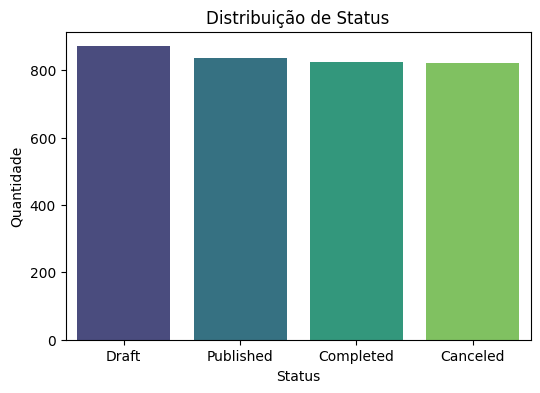


Taxa de respostas: 31.76%


/tmp/ipython-input-2792189658.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




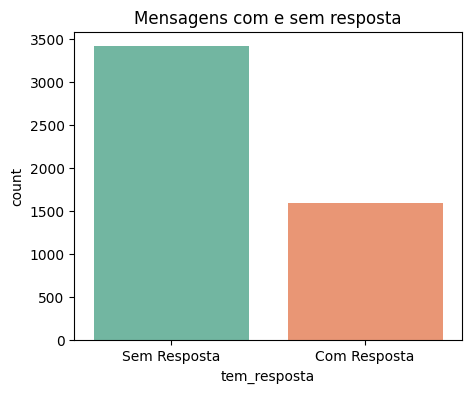

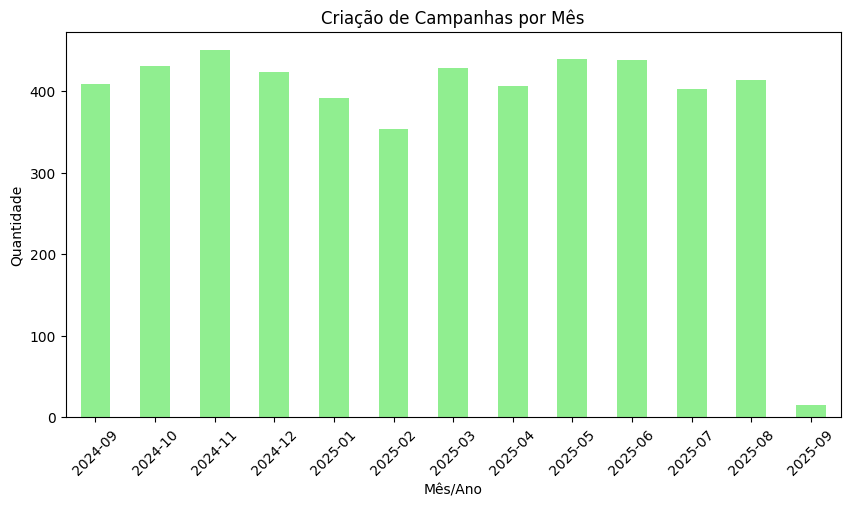

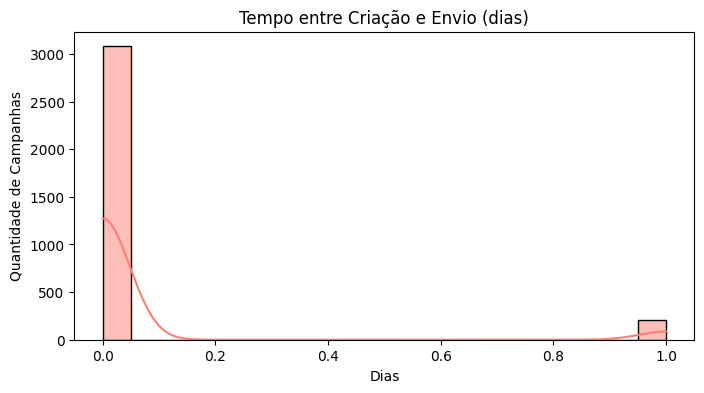


--- Média de mensagens por cliente/loja ---
count    995.000000
mean       5.025126
std        2.216722
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       15.000000
Name: id, dtype: float64


/tmp/ipython-input-2792189658.py:117: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




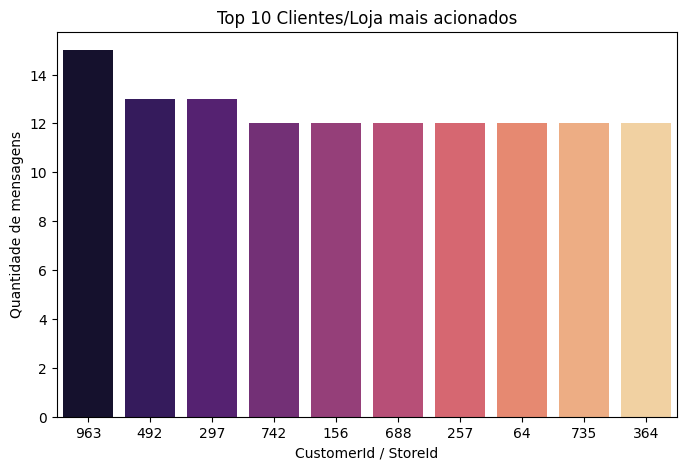

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Carregar os dados ===
df = pd.read_csv("CampaignQueue.csv", sep=";")

# Limpar espaços em nomes de colunas
df.columns = df.columns.str.strip()

# Converter colunas de datas existentes
for col in ["scheduledAt", "sendAt", "createdAt", "updatedAt"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)

# === 1. Visão geral ===
print("\n--- Estrutura ---")
print(df.info())
print("\n--- Valores nulos ---")
print(df.isnull().sum())
print("\n--- Estatísticas gerais ---")
print(df.describe(include="all"))

# === 2. Distribuição por Status ===
if "status" in df.columns:
    status_map = {1: "Draft", 2: "Canceled", 3: "Published", 4: "Completed"}
    df['status_nome'] = df['status'].map(status_map)

    plt.figure(figsize=(6,4))
    sns.countplot(x='status_nome', data=df, palette="viridis", order=df['status_nome'].value_counts().index)
    plt.title("Distribuição de Status")
    plt.xlabel("Status")
    plt.ylabel("Quantidade")
    plt.show()

# === 3. Distribuição por Tipo ===
if "type" in df.columns:
    type_map = {1: "Promocional", 2: "Institucional"}
    df['type_nome'] = df['type'].map(type_map)

    plt.figure(figsize=(6,4))
    sns.countplot(x='type_nome', data=df, palette="Set2", order=df['type_nome'].value_counts().index)
    plt.title("Distribuição por Tipo de Campanha")
    plt.xlabel("Tipo")
    plt.ylabel("Quantidade")
    plt.show()

# === 4. Taxa de respostas ===
if "response" in df.columns:
    df['tem_resposta'] = df['response'].notna().astype(int)
    taxa_resposta = df['tem_resposta'].mean() * 100
    print(f"\nTaxa de respostas: {taxa_resposta:.2f}%")

    plt.figure(figsize=(5,4))
    sns.countplot(x='tem_resposta', data=df, palette="Set2")
    plt.title("Mensagens com e sem resposta")
    plt.xticks([0,1], ["Sem Resposta", "Com Resposta"])
    plt.show()

# === 5. Evolução temporal (criação) ===
if "createdAt" in df.columns:
    df['created_month'] = df['createdAt'].dt.to_period('M')
    monthly_counts = df.groupby('created_month').size()

    plt.figure(figsize=(10,5))
    monthly_counts.plot(kind='bar', color='lightgreen')
    plt.title("Criação de Campanhas por Mês")
    plt.xlabel("Mês/Ano")
    plt.ylabel("Quantidade")
    plt.xticks(rotation=45)
    plt.show()

# === 6. Tempo entre criação e envio ===
if "sendAt" in df.columns and "createdAt" in df.columns:
    df['tempo_execucao'] = (df['sendAt'] - df['createdAt']).dt.days
    plt.figure(figsize=(8,4))
    sns.histplot(df['tempo_execucao'].dropna(), bins=20, kde=True, color='salmon')
    plt.title("Tempo entre Criação e Envio (dias)")
    plt.xlabel("Dias")
    plt.ylabel("Quantidade de Campanhas")
    plt.show()

# === 7. Campanhas em destaque ===
if "name" in df.columns:
    top_campaigns = df['name'].value_counts().head(10)

    plt.figure(figsize=(10,5))
    sns.barplot(x=top_campaigns.values, y=top_campaigns.index, palette='viridis')
    plt.title("Top 10 Campanhas por Recorrência")
    plt.xlabel("Quantidade de Ocorrências")
    plt.ylabel("Nome da Campanha")
    plt.show()

# === 8. Distribuição por Badge  ===
if "badge" in df.columns:
    badge_counts = df['badge'].value_counts()

    plt.figure(figsize=(8,4))
    sns.barplot(x=badge_counts.index, y=badge_counts.values, palette='coolwarm')
    plt.title("Distribuição de Campanhas por Badge")
    plt.xlabel("Badge")
    plt.ylabel("Quantidade de Campanhas")
    plt.xticks(rotation=45)
    plt.show()

# === 9. Análise por Cliente ou Loja ===
if "customerId" in df.columns:
    msgs_por_cliente = df.groupby("customerId")["id"].count().sort_values(ascending=False)
else:
    msgs_por_cliente = df.groupby("storeId")["id"].count().sort_values(ascending=False)

print("\n--- Média de mensagens por cliente/loja ---")
print(msgs_por_cliente.describe())

top10 = msgs_por_cliente.head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top10.index.astype(str), y=top10.values, palette="magma")
plt.title("Top 10 Clientes/Loja mais acionados")
plt.xlabel("CustomerId / StoreId")
plt.ylabel("Quantidade de mensagens")
plt.show()


In [ ]:

import pandas as pd
import numpy as np
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

# =====================================
# Carregar datasets
# =====================================
df_customer = pd.read_csv("Customer.csv", sep=";")
df_orders = pd.read_csv("Order.csv", sep=";")
df_campaign = pd.read_csv("CampaignQueue.csv", sep=";")

# =====================================
# Processamento Customer
# =====================================
# Converter datas
df_customer['dateofbirth'] = pd.to_datetime(df_customer['dateofbirth'], errors='coerce')

# Calcular idade
df_customer['age'] = ((pd.Timestamp.today() - df_customer['dateofbirth']).dt.days // 365)

# Faixas etárias
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['0-18','19-25','26-35','36-45','46-60','60+']
df_customer['age_group'] = pd.cut(df_customer['age'], bins=bins, labels=labels, right=False)

# Normalizar gênero
df_customer['gender'] = df_customer['gender'].str.strip().str.lower()
df_customer['gender'] = df_customer['gender'].replace({'feminino':'f','masculino':'m'})

# =====================================
# Processamento Orders
# =====================================
# Extrair customer_id do objeto JSON se necessário
import ast

def extract_id(x):
    try:
        if pd.isna(x):
            return None
        if isinstance(x, str):
            x = ast.literal_eval(x)
        return x.get("id")
    except:
        return None

df_orders['customer_id'] = df_orders['customer'].apply(extract_id)

# Merge Orders + Customers
df_merged = df_orders.merge(df_customer, left_on='customer_id', right_on='id', how='left')

# Conversão de unidades
df_merged['takeout_minutes'] = df_merged['takeouttimeinseconds'] / 60

# Criar coluna mês para análise temporal
df_merged['created_month'] = pd.to_datetime(df_merged['createdat']).dt.to_period('M')

# =====================================
# Processamento CampaignQueue
# =====================================
df_campaign['scheduledAt'] = pd.to_datetime(df_campaign['scheduledAt'], errors='coerce')
df_campaign['sendAt'] = pd.to_datetime(df_campaign['sendAt'], errors='coerce')

# Tempo entre agendamento e envio
df_campaign['delay_minutes'] = (df_campaign['sendAt'] - df_campaign['scheduledAt']).dt.total_seconds() / 60

# =====================================
# Dash App
# =====================================
app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Dashboard Cannoli - FECAP", style={'textAlign':'center'}),

    html.Div([
        html.Div([
            html.Label("Faixa Etária"),
            dcc.Dropdown(
                options=[{"label": x, "value": x} for x in df_merged["age_group"].cat.categories],
                value=[],
                multi=True,
                id="filter_age"
            )
        ], style={'width':'30%', 'display':'inline-block'}),

        html.Div([
            html.Label("Gênero"),
            dcc.Dropdown(
                options=[{"label": x.upper(), "value": x} for x in df_merged['gender'].dropna().unique()],
                value=[],
                multi=True,
                id="filter_gender"
            )
        ], style={'width':'30%', 'display':'inline-block', 'marginLeft':'2%'}),

        html.Div([
            html.Label("Canal de Venda"),
            dcc.Dropdown(
                options=[{"label": x, "value": x} for x in df_merged['saleschannel'].dropna().unique()],
                value=[],
                multi=True,
                id="filter_channel"
            )
        ], style={'width':'30%', 'display':'inline-block', 'marginLeft':'2%'}),
    ], style={'marginBottom':'30px'}),

    dcc.Tabs([
        dcc.Tab(label="Vendas", children=[
            dcc.Graph(id="graph_ticket_age"),
            dcc.Graph(id="graph_orders_month"),
            dcc.Graph(id="graph_channel")
        ]),
        dcc.Tab(label="Campanhas", children=[
            dcc.Graph(id="graph_campaign_status"),
            dcc.Graph(id="graph_campaign_delay")
        ])
    ])
])

@app.callback(
    Output("graph_ticket_age", "figure"),
    Output("graph_orders_month", "figure"),
    Output("graph_channel", "figure"),
    Output("graph_campaign_status", "figure"),
    Output("graph_campaign_delay", "figure"),
    Input("filter_age", "value"),
    Input("filter_gender", "value"),
    Input("filter_channel", "value")
)
def update_graphs(selected_age, selected_gender, selected_channel):
    df_filtered = df_merged.copy()

    if selected_age:
        df_filtered = df_filtered[df_filtered['age_group'].isin(selected_age)]
    if selected_gender:
        df_filtered = df_filtered[df_filtered['gender'].isin(selected_gender)]
    if selected_channel:
        df_filtered = df_filtered[df_filtered['saleschannel'].isin(selected_channel)]

    # 1️⃣ Ticket médio por faixa etária
    ticket_faixa = df_filtered.groupby('age_group', observed=True)['totalamount'].mean().reindex(df_merged['age_group'].cat.categories)
    fig_ticket = px.bar(ticket_faixa, labels={'value':'Ticket Médio', 'age_group':'Faixa Etária'}, title="Ticket Médio por Faixa Etária")

    # 2️⃣ Pedidos por mês
    orders_month = df_filtered.groupby('created_month')['id_x'].count()
    fig_month = px.line(orders_month, labels={'value':'Qtd de Pedidos','created_month':'Mês'}, title="Pedidos por Mês")

    # 3️⃣ Pedidos por canal
    orders_channel = df_filtered['saleschannel'].value_counts()
    fig_channel = px.pie(orders_channel, names=orders_channel.index, values=orders_channel.values, title="Pedidos por Canal")

    # 4️⃣ Campanhas por status
    status_counts = df_campaign['status'].value_counts()
    fig_campaign_status = px.bar(status_counts, labels={'index':'Status','value':'Qtd'}, title="Campanhas por Status")

    # 5️⃣ Delay médio entre agendamento e envio
    fig_campaign_delay = px.histogram(df_campaign, x='delay_minutes', nbins=20, title="Tempo entre Agendamento e Envio (minutos)")

    return fig_ticket, fig_month, fig_channel, fig_campaign_status, fig_campaign_delay

# =====================================
# Run server
# =====================================
if __name__ == '__main__':
    app.run_server(mode='inline')


Colunas disponíveis: ['id', 'segmentId', 'templateId', 'storeId', 'name', 'description', 'badge', 'type', 'status', 'isDefault', 'createdAt', 'createdBy', 'updatedAt', 'updatedBy']


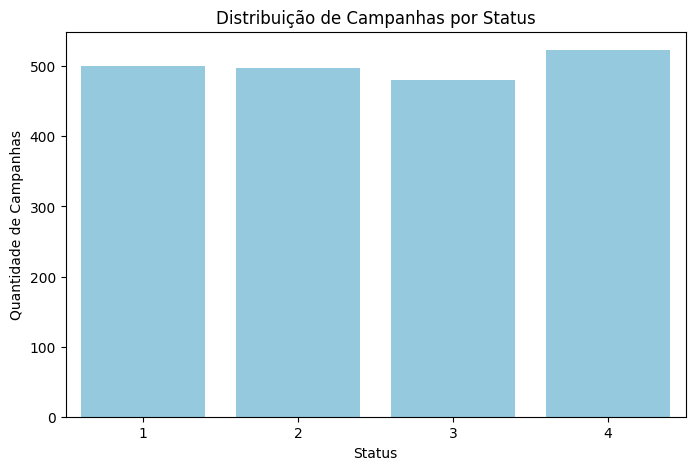

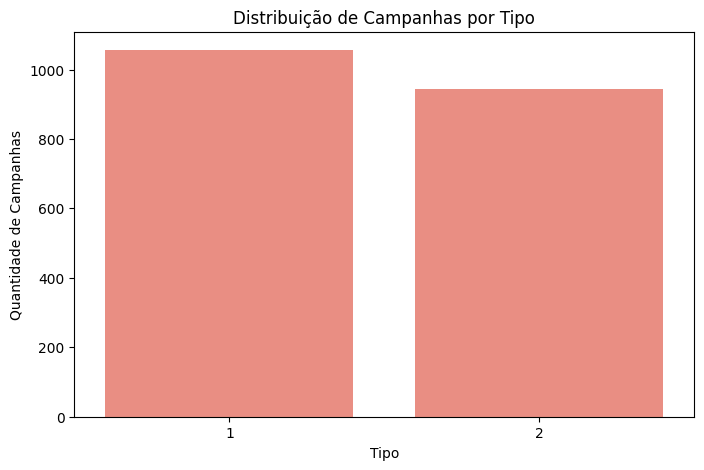

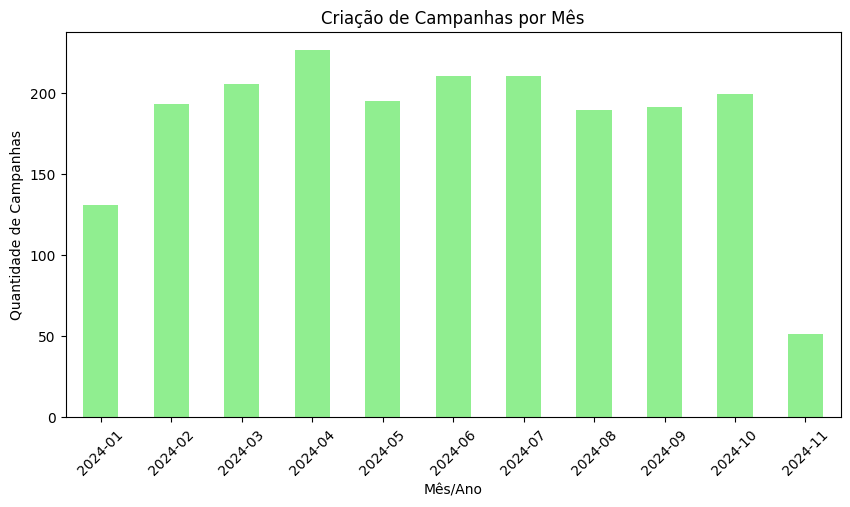

/tmp/ipython-input-1818300885.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




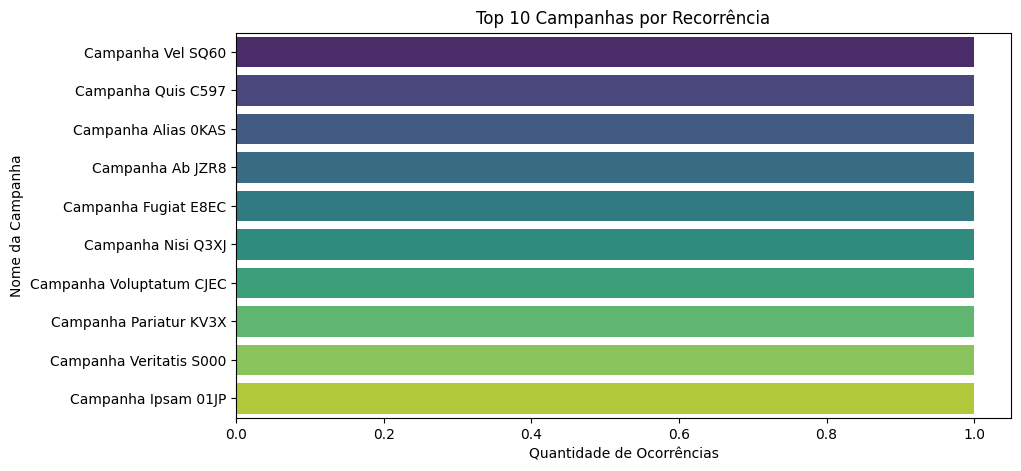

/tmp/ipython-input-1818300885.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




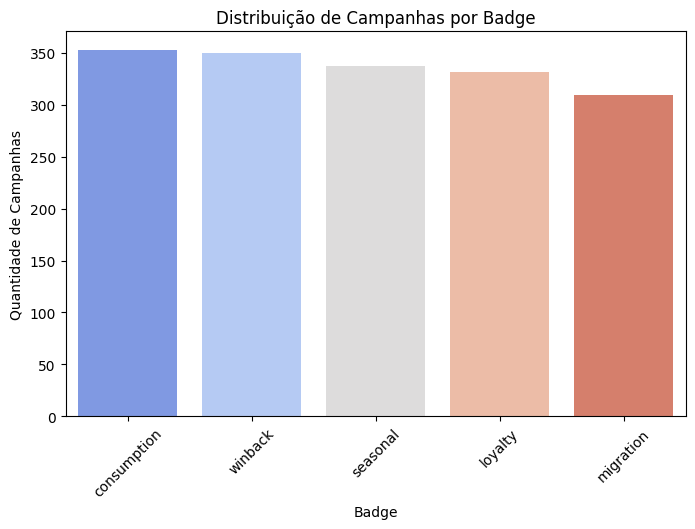

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Carregar os dados ===
df = pd.read_csv("Campaign.csv", sep=";")

# Limpar espaços nos nomes das colunas
df.columns = df.columns.str.strip()

# Conferir colunas
print("Colunas disponíveis:", df.columns.tolist())

# === Distribuição por Status ===
status_counts = df['status'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.countplot(x='status', data=df, order=status_counts.index, color='skyblue')
plt.title("Distribuição de Campanhas por Status")
plt.ylabel("Quantidade de Campanhas")
plt.xlabel("Status")
plt.show()

# === Distribuição por Tipo ===
tipo_counts = df['type'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df, order=tipo_counts.index, color='salmon')
plt.title("Distribuição de Campanhas por Tipo")
plt.ylabel("Quantidade de Campanhas")
plt.xlabel("Tipo")
plt.show()

# === Evolução Temporal ===
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['created_month'] = df['createdAt'].dt.to_period('M')

monthly_counts = df.groupby('created_month').size()
plt.figure(figsize=(10,5))
monthly_counts.plot(kind='bar', color='lightgreen')
plt.title("Criação de Campanhas por Mês")
plt.ylabel("Quantidade de Campanhas")
plt.xlabel("Mês/Ano")
plt.xticks(rotation=45)
plt.show()

# === Campanhas em Destaque (mais recorrentes) ===
top_campaigns = df['name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_campaigns.values, y=top_campaigns.index, palette='viridis')
plt.title("Top 10 Campanhas por Recorrência")
plt.xlabel("Quantidade de Ocorrências")
plt.ylabel("Nome da Campanha")
plt.show()

# === Distribuição por Badge ===
if 'badge' in df.columns:
    badge_counts = df['badge'].value_counts()
    plt.figure(figsize=(8,5))
    sns.barplot(x=badge_counts.index, y=badge_counts.values, palette='coolwarm')
    plt.title("Distribuição de Campanhas por Badge")
    plt.xlabel("Badge")
    plt.ylabel("Quantidade de Campanhas")
    plt.xticks(rotation=45)
    plt.show()
